In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Seasonal data

In [3]:
CAB = pd.read_excel('Economic Data/current account balance.xlsx', sheet_name='工作表2')
GDP = pd.read_excel('Economic Data/GDP.xlsx', sheet_name='工作表2')
IMP = pd.read_excel('Economic Data/imports.xlsx', sheet_name='工作表2')
INR = pd.read_excel('Economic Data/international reserve.xlsx', sheet_name='工作表2')
NFA = pd.read_excel('Economic Data/net foreign assets.xlsx', sheet_name='工作表2')

In [4]:
ECO = {'current_account_balance':CAB, 'GDP':GDP, 'imports':IMP, 'international_reserve':INR, 'net_foreign_assets':NFA}
countries = ('AU','BR','CN','CZ','DK','HN','JP','MX','NZ','NW','PO','SP','SA','KO','SD','SW','TW','TK','UK','EK')

In [5]:
FX = pd.read_excel('exchage_rate.xlsx', index_col=0)
FX.index = pd.to_datetime(FX.index)
FX = FX.rename_axis('Date', axis='index')

In [6]:
FX_FW = pd.read_excel('exchange_forward3M.xlsx', index_col=0)
FX_FW.index = pd.to_datetime(FX_FW.index)
FX_FW = FX_FW.rename_axis('Date', axis='index')

In [7]:
# 處理經濟資料
for key,df in ECO.items():
    # 第一和第二列要被刪除
    df = df.drop(df.columns[[0, 1]], axis=1)
    # 將 'Name' 欄位更改後設置為索引
    df['Name'] = countries
    df.set_index('Name', inplace=True)
    ECO[key] = df

In [8]:
# 為貨幣轉換做準備
Cur = {}
for i in range(len(ECO['GDP'])):
    Cur[ECO['GDP']['CURRENCY'][i]] = ECO['GDP'].index[i]

# 用收盤價中價作為轉換時的匯率
start = 2
step = 3
end = len(FX.columns)
selected_columns = list(range(start - 1, end, step))  # 列索引從0開始，因此减1

# 將匯率進行倒數處理函數，之後應該要去圖書館下載正確方向的資料
def inverse_if_condition_fixed(column):
    if column.name.startswith('US'):
        return column
    else:
        # Convert x to float before reciprocal to avoid integer division issues
        return column.apply(lambda x: np.nan if pd.isna(x) else 1.0 / float(x))
    
# 使用iloc按索引提取列並創建新的 DataFrame
Mid_FX = FX.iloc[:, selected_columns].apply(inverse_if_condition_fixed)
Mid_FX.columns = countries

Mid_FX_FW = FX_FW.iloc[:, selected_columns].apply(inverse_if_condition_fixed)
Mid_FX_FW.columns = countries

In [9]:
Mid_FX_FW

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,PO,SP,SA,KO,SD,SW,TW,TK,UK,EK
Date,,,,,,,,,,,,,,,,,,,,
2000-11-23,0.52289,NaN,0.648698,0.024528,0.112989,0.128441,0.009206,0.103231,0.400657,0.104923,NaN,0.574729,0.126562,NaN,0.097681,0.557864,NaN,1.298701,1.402977,0.845559
2000-11-24,0.52389,NaN,0.651232,0.024587,0.113006,0.128448,0.009122,0.103322,0.399696,0.104691,NaN,0.573740,0.126614,NaN,0.097351,0.557227,NaN,1.291139,1.404356,0.843270
2000-11-27,0.52688,NaN,0.652678,0.024685,0.114572,0.128439,0.009175,0.103605,0.406454,0.105745,NaN,0.575622,0.127624,NaN,0.098250,0.565467,NaN,1.282808,1.419547,0.852348
2000-11-28,0.52318,NaN,0.652167,0.024935,0.115209,0.128440,0.009220,0.103061,0.405055,0.106380,NaN,0.574861,0.127595,NaN,0.099030,0.569703,NaN,1.190221,1.421949,0.858421
2000-11-29,0.52180,NaN,0.649026,0.024836,0.115378,0.128441,0.009125,0.103327,0.404449,0.106763,NaN,0.574696,0.127632,NaN,0.099543,0.573325,NaN,1.456452,1.425435,0.863573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17,0.65313,0.202443,0.730204,0.044384,0.147000,0.128345,0.006779,0.057173,0.659979,0.092393,0.247649,0.747339,0.054042,0.000776,0.095231,1.139445,0.031944,0.032087,1.244199,1.093159
2023-11-20,0.65790,0.203664,0.729554,0.044561,0.147501,0.128394,0.006841,0.057536,0.659979,0.093624,0.250760,0.749929,0.053972,0.000779,0.095962,1.142322,0.032276,0.031980,1.250359,1.098370
2023-11-21,0.65753,0.202583,0.731021,0.044395,0.147148,0.128344,0.006843,0.057256,0.659979,0.094104,0.249444,0.750948,0.053665,0.000778,0.096367,1.144807,0.032450,0.031962,1.254611,1.098008


In [10]:
# 找出每個月的最後一日
last_days = Mid_FX.groupby(Mid_FX.index.to_period('M')).tail(1)

# 取得3, 6, 9, 12月的最後一日
selected_months = last_days[last_days.index.month.isin([3, 6, 9, 12])]

# 建立新的 DataFrame，只包含符合條件的 rows
Mid_FX_Q = Mid_FX.loc[selected_months.index]
Mid_FX_FW_Q = Mid_FX_FW.loc[selected_months.index]

In [11]:
# 處理ECO column names，將其轉換成日期格式
# net_foreign_assets為月頻，與其他資料形式不同，先做處理
selected_columns = ['CURRENCY'] + list(Mid_FX_Q.index)
ECO['net_foreign_assets'] = ECO['net_foreign_assets'][selected_columns]

# 先製作一個對照表
Q2dt_dict = {
    ECO['GDP'].columns[2:][::-1][i]: Mid_FX_Q.index[i] for i in range(len(Mid_FX_Q))
}
for key,df in ECO.items():
    df = df.rename(columns=Q2dt_dict).drop('Q4 2023', axis=1, errors='ignore')
    ECO[key] = df[selected_columns]

# 現在保留了所有需要的資訊，可以將貨幣統一轉換為美元了。

for key,df in ECO.items():
    temp_df = df.copy()
    for country in df.index:
        if df.loc[country, 'CURRENCY'] != 'U$':
            currency = Cur[df.loc[country, 'CURRENCY']]
            for dt in list(Mid_FX_Q.index):
                temp_df.loc[country, dt] = float(df.loc[country, dt]*Mid_FX.loc[dt, currency])
    temp_df.drop('CURRENCY', axis=1, inplace=True)
    ECO[key] = temp_df

In [12]:
ECO['current_account_balance'].head()

,2000-12-29,2001-03-30,2001-06-29,2001-09-28,2001-12-31,2002-03-29,2002-06-28,2002-09-30,2002-12-31,2003-03-31,...,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31,2023-06-30,2023-09-29
Name,,,,,,,,,,,,,,,,,,,,,
AU,-2.834629e+09,-2.044513e+09,-1.861167e+09,-2.015456e+09,-2.454556e+09,-2.453421e+09,-3.759137e+09,-4.892787e+09,-5.455887e+09,-5.636297e+09,...,1.957508e+10,1.231968e+10,4.221983e+09,1.083618e+09,1.340297e+10,-5.695897e+09,9.230300e+09,6.801331e+09,9.309787e+09,NaN
BR,-9.683240e+09,-7.117639e+09,-7.114823e+09,-4.455181e+09,-6.202435e+09,-3.642621e+09,-5.593656e+09,5.394717e+08,-7.102379e+08,-2.558931e+08,...,7.067412e+09,-9.525900e+09,-2.226208e+10,-1.297063e+10,-2.470783e+09,-1.924091e+10,-1.893718e+10,-1.263396e+10,-2.049615e+09,-6.211240e+09
CN,6.204297e+09,5.586146e+09,4.325609e+09,4.437761e+09,1.858040e+09,3.257286e+09,3.124835e+09,4.436322e+09,2.371717e+09,1.355493e+09,...,-3.815747e+09,-5.646688e+09,3.042893e+09,5.013199e+09,2.335988e+09,-1.055467e+10,-2.792414e+09,-1.572951e+09,-7.820668e+09,NaN
CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.097292e+08,-5.607008e+09,-3.532389e+09,-8.711637e+08,-3.612157e+09,-9.057966e+09,-3.703379e+09,1.574882e+09,-1.395205e+09,-4.038713e+08
DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.453324e+09,1.005312e+10,1.042536e+10,8.656873e+09,1.415633e+10,1.654391e+10,1.359106e+10,9.045932e+09,1.305815e+10,9.040540e+09


<Axes: ylabel='BR'>

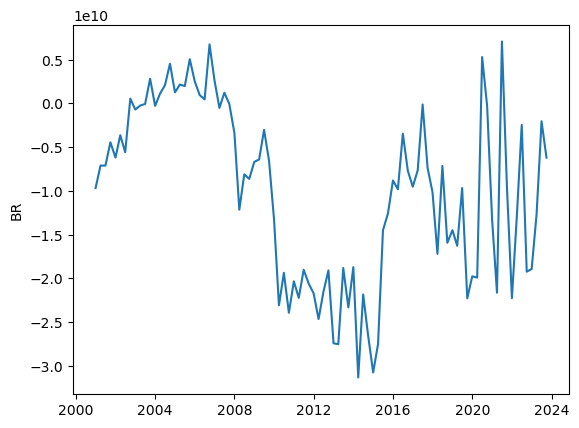

In [13]:
sns.lineplot(ECO['current_account_balance'].loc['BR'])

In [14]:
ECO['GDP'].head()

,2000-12-29,2001-03-30,2001-06-29,2001-09-28,2001-12-31,2002-03-29,2002-06-28,2002-09-30,2002-12-31,2003-03-31,...,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31,2023-06-30,2023-09-29
Name,,,,,,,,,,,,,,,,,,,,,
AU,1.009080e+11,8.450965e+10,9.066927e+10,9.029531e+10,1.003030e+11,9.848696e+10,1.081178e+11,1.067686e+11,1.176639e+11,1.177900e+11,...,4.144069e+11,3.917154e+11,4.245699e+11,4.248924e+11,4.235919e+11,3.946056e+11,4.445389e+11,4.152469e+11,4.270986e+11,NaN
BR,1.643491e+11,1.451323e+11,1.401097e+11,1.245410e+11,1.501677e+11,1.472244e+11,1.303861e+11,1.010092e+11,1.128060e+11,1.180861e+11,...,4.390794e+11,4.141775e+11,4.145430e+11,4.885977e+11,4.702261e+11,4.696754e+11,4.888160e+11,5.048991e+11,5.538242e+11,NaN
CN,1.907780e+11,1.758970e+11,1.896560e+11,1.848107e+11,1.809655e+11,1.745528e+11,1.956110e+11,1.946733e+11,1.965880e+11,2.052244e+11,...,4.910052e+11,5.159543e+11,5.313683e+11,5.168307e+11,5.388588e+11,5.299125e+11,5.240543e+11,4.944769e+11,5.242665e+11,NaN
CZ,1.685700e+10,1.483394e+10,1.612988e+10,1.774166e+10,1.939685e+10,1.745441e+10,2.293664e+10,2.239334e+10,2.340431e+10,2.216083e+10,...,7.147065e+10,7.210996e+10,7.366899e+10,6.988092e+10,7.188237e+10,6.988098e+10,7.951983e+10,7.923087e+10,8.492820e+10,NaN
DK,4.449292e+10,3.871952e+10,3.893569e+10,4.173898e+10,4.306583e+10,3.961930e+10,4.738498e+10,4.650198e+10,5.195232e+10,5.104608e+10,...,1.011628e+11,9.916400e+10,1.056380e+11,9.810881e+10,1.007471e+11,9.488100e+10,1.062126e+11,1.001832e+11,1.024444e+11,NaN


In [15]:
ECO['imports'].head()

,2000-12-29,2001-03-30,2001-06-29,2001-09-28,2001-12-31,2002-03-29,2002-06-28,2002-09-30,2002-12-31,2003-03-31,...,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31,2023-06-30,2023-09-29
Name,,,,,,,,,,,,,,,,,,,,,
AU,2.281429e+10,1.784249e+10,1.950288e+10,1.959296e+10,2.058244e+10,1.986487e+10,2.224437e+10,2.321248e+10,2.561997e+10,2.468017e+10,...,7.171697e+10,7.300866e+10,8.210656e+10,8.853377e+10,8.808167e+10,9.206149e+10,9.573783e+10,8.656344e+10,8.885435e+10,NaN
BR,2.208305e+10,1.992644e+10,2.102464e+10,1.929684e+10,2.104395e+10,1.666018e+10,1.499342e+10,1.494213e+10,1.755765e+10,1.724622e+10,...,7.738026e+10,7.521052e+10,8.315872e+10,9.127679e+10,8.770692e+10,9.782174e+10,9.262705e+10,8.575118e+10,8.829907e+10,NaN
CN,7.263744e+10,6.732682e+10,7.228824e+10,6.288337e+10,6.317085e+10,6.297712e+10,7.243877e+10,6.696578e+10,6.915623e+10,7.276888e+10,...,1.536125e+11,1.549621e+11,1.656846e+11,1.688041e+11,1.880295e+11,1.769902e+11,1.759590e+11,1.738769e+11,1.848414e+11,NaN
CZ,9.042749e+09,8.036600e+09,8.191204e+09,8.410546e+09,9.465768e+09,8.467671e+09,1.037732e+10,9.818874e+09,1.120865e+10,1.075242e+10,...,5.022157e+10,4.741777e+10,5.316597e+10,5.251897e+10,5.532154e+10,5.142191e+10,6.060424e+10,5.727809e+10,5.569479e+10,NaN
DK,1.763523e+10,1.531266e+10,1.524186e+10,1.586275e+10,1.602995e+10,1.578139e+10,1.842114e+10,1.787718e+10,1.998657e+10,1.959477e+10,...,5.106363e+10,5.204960e+10,5.746736e+10,5.671616e+10,5.888765e+10,5.675949e+10,6.317193e+10,5.759511e+10,5.977486e+10,NaN


In [16]:
ECO['international_reserve'].head()

,2000-12-29,2001-03-30,2001-06-29,2001-09-28,2001-12-31,2002-03-29,2002-06-28,2002-09-30,2002-12-31,2003-03-31,...,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31,2023-06-30,2023-09-29
Name,,,,,,,,,,,,,,,,,,,,,
AU,1.683328e+10,1.523497e+10,1.726267e+10,1.717333e+10,1.647598e+10,1.536043e+10,1.840327e+10,1.796105e+10,1.851589e+10,1.701766e+10,...,3.725000e+10,3.829829e+10,3.750055e+10,3.640897e+10,3.438452e+10,3.464667e+10,3.851689e+10,3.629587e+10,3.705876e+10,3.572217e+10
BR,3.301150e+10,3.440713e+10,3.731825e+10,4.005418e+10,3.586642e+10,3.672096e+10,4.199860e+10,3.838095e+10,3.782346e+10,4.233521e+10,...,3.524861e+11,3.688860e+11,3.622039e+11,3.531690e+11,3.419580e+11,3.275799e+11,3.247029e+11,3.411579e+11,3.436202e+11,3.403237e+11
CN,3.242400e+10,3.351200e+10,3.301500e+10,3.421900e+10,3.424800e+10,3.402900e+10,3.719000e+10,3.661500e+10,3.716900e+10,3.592600e+10,...,8.905300e+10,1.062700e+11,1.066150e+11,1.037640e+11,1.062820e+11,1.026890e+11,1.072550e+11,1.099600e+11,1.142840e+11,1.124460e+11
CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.670585e+11,1.691664e+11,1.736130e+11,1.736912e+11,1.546333e+11,1.326124e+11,1.399823e+11,1.411492e+11,1.414732e+11,1.383734e+11
DK,1.585287e+10,1.371006e+10,1.384657e+10,1.788638e+10,1.781839e+10,2.040063e+10,2.410419e+10,2.698608e+10,2.788153e+10,2.916778e+10,...,7.345095e+10,7.845395e+10,8.146033e+10,8.010935e+10,7.599676e+10,7.393167e+10,8.570201e+10,8.774793e+10,8.939640e+10,8.655077e+10


In [17]:
ECO['net_foreign_assets'].head()

,2000-12-29,2001-03-30,2001-06-29,2001-09-28,2001-12-31,2002-03-29,2002-06-28,2002-09-30,2002-12-31,2003-03-31,...,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31,2023-06-30,2023-09-29
Name,,,,,,,,,,,,,,,,,,,,,
AU,NaN,NaN,NaN,NaN,2.072379e+10,2.315243e+10,2.436270e+10,2.435668e+10,2.484643e+10,2.533442e+10,...,4.988500e+10,6.246005e+10,6.142352e+10,6.095497e+10,5.820203e+10,5.865349e+10,6.467072e+10,6.420873e+10,6.694891e+10,1.559167e+11
BR,NaN,NaN,NaN,NaN,2.736817e+10,2.697857e+10,2.465161e+10,1.750186e+10,1.186065e+10,1.190455e+10,...,3.504227e+11,3.494237e+11,3.431211e+11,3.339923e+11,3.229138e+11,3.091962e+11,3.021212e+11,3.235916e+11,3.270669e+11,3.209249e+11
CN,NaN,NaN,NaN,NaN,4.274686e+07,5.022375e+07,1.371938e+07,4.018401e+07,-2.898455e+07,4.528983e+07,...,5.482268e+09,6.710071e+09,5.440085e+09,1.724370e+10,2.465764e+10,2.314984e+10,2.349452e+10,1.981700e+10,2.216158e+10,NaN
CZ,NaN,1.263202e+10,1.262101e+10,1.358789e+10,1.466204e+10,1.459286e+10,2.107642e+10,2.235327e+10,2.379683e+10,2.463826e+10,...,1.625947e+11,1.622437e+11,1.593439e+11,1.545182e+11,1.358157e+11,1.135272e+11,1.241324e+11,1.263195e+11,1.295534e+11,NaN
DK,NaN,NaN,NaN,NaN,1.754790e+10,1.993832e+10,2.324730e+10,2.666079e+10,2.747721e+10,2.938399e+10,...,7.048676e+10,7.082313e+10,7.402348e+10,7.239361e+10,6.757025e+10,6.597905e+10,7.627682e+10,8.095367e+10,8.242571e+10,NaN


## 以上資料基本處理完畢
## 會用到的資料 
### ECO['current_acount_balance']
### ECO['GDP']
### ECO['imports']
### ECO['international_reserve']
### ECO['net_foreign_assets']

### Mid_FX

#### 精細一點的買賣價格：買進該貨幣用Bid_FX, 賣出該貨幣用Ask_FX

In [18]:
# 用收盤價中價作為轉換時的匯率
start = 1
step = 3
end = len(FX.columns)
selected_columns = list(range(start - 1, end, step))  # 列索引從0開始，因此减1

# 使用iloc按索引提取列並創建新的 DataFrame
Bid_FX = FX.iloc[:, selected_columns].apply(inverse_if_condition_fixed)
Bid_FX.columns = countries

In [19]:
# 用收盤價中價作為轉換時的匯率
start = 3
step = 3
end = len(FX.columns)
selected_columns = list(range(start - 1, end, step))  # 列索引從0開始，因此减1

# 使用iloc按索引提取列並創建新的 DataFrame
Ask_FX = FX.iloc[:, selected_columns].apply(inverse_if_condition_fixed)
Ask_FX.columns = countries

## 持倉三個月

### 算出比率後進行排序

In [99]:
Cab = ECO['current_account_balance']/ECO['GDP']
Inr = ECO['international_reserve']/ECO['GDP']
Nfa = ECO['net_foreign_assets']/ECO['imports']

In [21]:
Eco = {}
Eco['current_account_balance'] = Cab.dropna(axis=1)
Eco['international_reserve'] = Inr.dropna(axis=1)
Eco['net_foreign_assets'] = Nfa.dropna(axis=1)

#### 先只對完全沒有缺失值的部分進行實驗

In [101]:
# 取得多個 DataFrame 中相同的 column names 的集合
common_columns = set(Eco['current_account_balance'].columns) & set(Eco['international_reserve'].columns)\
      & set(Eco['net_foreign_assets'].columns)

# 將交集部分的列名進行排序
sorted_common_columns = sorted(common_columns)

for key,df in Eco.items():
    Eco[key] = df[sorted_common_columns]

In [102]:
Eco['current_account_balance']

,2000-12-29,2001-03-30,2001-06-29,2001-09-28,2001-12-31,2002-03-29,2002-06-28,2002-09-30,2002-12-31,2003-03-31,...,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31,2023-06-30,2023-09-29
Name,,,,,,,,,,,,,,,,,,,,,
AU,-0.028091,-0.024193,-0.020527,-0.022321,-0.024471,-0.024911,-0.034769,-0.045826,-0.046368,-0.047850,...,0.047236,0.031451,0.009944,0.002550,0.031641,-0.014434,0.020764,0.016379,0.021798,NaN
BR,-0.058919,-0.049042,-0.050780,-0.035773,-0.041303,-0.024742,-0.042901,0.005341,-0.006296,-0.002167,...,0.016096,-0.023000,-0.053703,-0.026547,-0.005254,-0.040966,-0.038741,-0.025023,-0.003701,NaN
CN,0.032521,0.031758,0.022808,0.024012,0.010267,0.018661,0.015975,0.022789,0.012064,0.006605,...,-0.007771,-0.010944,0.005727,0.009700,0.004335,-0.019918,-0.005328,-0.003181,-0.014917,NaN
CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.007132,-0.077756,-0.047949,-0.012466,-0.050251,-0.129620,-0.046572,0.019877,-0.016428,NaN
DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.093447,0.101379,0.098690,0.088237,0.140514,0.174365,0.127961,0.090294,0.127466,NaN
HN,-0.003152,-0.002407,-0.001891,-0.000528,-0.001808,-0.001851,-0.001680,-0.001263,-0.003185,-0.002926,...,-0.000783,-0.001435,-0.001838,-0.001370,-0.001310,-0.002076,-0.001988,-0.000326,0.000317,NaN
JP,0.019000,0.023972,0.016354,0.020223,0.018147,0.032137,0.025949,0.025548,0.021084,0.028166,...,0.040783,0.045577,0.024997,0.035311,0.015153,0.015831,0.011146,0.016850,0.035826,0.052347
MX,-0.034964,-0.025880,-0.018252,-0.017888,-0.029710,-0.018708,-0.010660,-0.014646,-0.021704,-0.009467,...,0.015236,-0.014105,0.003752,-0.036197,-0.005324,-0.018020,0.006778,-0.049863,NaN,NaN
NZ,-0.034305,0.036075,0.013403,-0.046413,-0.033942,0.015922,0.000370,-0.064994,-0.035617,0.022867,...,-0.013623,-0.101878,-0.079202,-0.069326,-0.066336,-0.118579,-0.096090,-0.047041,-0.041546,NaN


In [23]:
# 定義一個函數將排名拆成五等分
def map_rank_to_group(value):
    if value <= 4:
        return 1
    elif value <= 8:
        return 2
    elif value <= 12:
        return 3
    elif value <= 16:
        return 4
    else:
        return 5
# 定義一個函數來計算每一行的變化次數
def calculate_change(row):
    change_count = 0
    for i in range(1, len(row)):
        if row[i] != row[i - 1]:
            change_count += 1
    return change_count


In [24]:
Eco_rank = {}
for key,df in Eco.items():
    rank = df.rank(axis=0, method='min', ascending=False)
    # 將排名映射為五種值
    rank_in_5 = rank.applymap(map_rank_to_group)
    # 使用 apply 函數計算每個 row 的變化次數
    change_times = rank_in_5.apply(calculate_change, axis=1)

    # 將結果存儲為新的 DataFrame，並設置 column name 為 'change_time'
    Change_times_df = pd.DataFrame({'Change times': change_times}, index=rank_in_5.index)

    # 檢查出現次數
    for idx in Change_times_df.index:
        counts = rank_in_5.loc[idx].value_counts()
        value_1, times_1 = counts.index[0], counts.iloc[0]
        if len(counts.index)==1:
            value_2, times_2 = np.nan, 0
        else:
            value_2, times_2 = counts.index[1], counts.iloc[1]
        Change_times_df.loc[idx, 'Mode'] = f'{value_1} 出現 {times_1} 次'
        Change_times_df.loc[idx, 'Sec'] = f'{value_2} 出現 {times_2}次'

    Eco_rank[key+'_ranked'] = rank
    Eco_rank[key+'_ranked_5'] = rank_in_5
    Eco_rank[key+'_change_times'] = Change_times_df

In [111]:
Eco['current_account_balance']

,2000-12-29,2001-03-30,2001-06-29,2001-09-28,2001-12-31,2002-03-29,2002-06-28,2002-09-30,2002-12-31,2003-03-31,...,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31,2023-06-30,2023-09-29
Name,,,,,,,,,,,,,,,,,,,,,
AU,-0.028091,-0.024193,-0.020527,-0.022321,-0.024471,-0.024911,-0.034769,-0.045826,-0.046368,-0.047850,...,0.047236,0.031451,0.009944,0.002550,0.031641,-0.014434,0.020764,0.016379,0.021798,NaN
BR,-0.058919,-0.049042,-0.050780,-0.035773,-0.041303,-0.024742,-0.042901,0.005341,-0.006296,-0.002167,...,0.016096,-0.023000,-0.053703,-0.026547,-0.005254,-0.040966,-0.038741,-0.025023,-0.003701,NaN
CN,0.032521,0.031758,0.022808,0.024012,0.010267,0.018661,0.015975,0.022789,0.012064,0.006605,...,-0.007771,-0.010944,0.005727,0.009700,0.004335,-0.019918,-0.005328,-0.003181,-0.014917,NaN
CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.007132,-0.077756,-0.047949,-0.012466,-0.050251,-0.129620,-0.046572,0.019877,-0.016428,NaN
DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.093447,0.101379,0.098690,0.088237,0.140514,0.174365,0.127961,0.090294,0.127466,NaN
HN,-0.003152,-0.002407,-0.001891,-0.000528,-0.001808,-0.001851,-0.001680,-0.001263,-0.003185,-0.002926,...,-0.000783,-0.001435,-0.001838,-0.001370,-0.001310,-0.002076,-0.001988,-0.000326,0.000317,NaN
JP,0.019000,0.023972,0.016354,0.020223,0.018147,0.032137,0.025949,0.025548,0.021084,0.028166,...,0.040783,0.045577,0.024997,0.035311,0.015153,0.015831,0.011146,0.016850,0.035826,0.052347
MX,-0.034964,-0.025880,-0.018252,-0.017888,-0.029710,-0.018708,-0.010660,-0.014646,-0.021704,-0.009467,...,0.015236,-0.014105,0.003752,-0.036197,-0.005324,-0.018020,0.006778,-0.049863,NaN,NaN
NZ,-0.034305,0.036075,0.013403,-0.046413,-0.033942,0.015922,0.000370,-0.064994,-0.035617,0.022867,...,-0.013623,-0.101878,-0.079202,-0.069326,-0.066336,-0.118579,-0.096090,-0.047041,-0.041546,NaN


In [135]:
Eco_rank['current_account_balance_ranked']

,2016-12-30,2017-03-31,2017-06-30,2017-09-29,2017-12-29,2018-03-30,2018-06-29,2018-09-28,2018-12-31,2019-03-29,...,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31
Name,,,,,,,,,,,,,,,,,,,,,
AU,16.0,14.0,17.0,16.0,18.0,14.0,16.0,14.0,16.0,13.0,...,11.0,9.0,9.0,10.0,11.0,12.0,7.0,11.0,7.0,10.0
BR,17.0,15.0,11.0,11.0,15.0,16.0,15.0,15.0,18.0,17.0,...,18.0,20.0,12.0,16.0,19.0,15.0,13.0,18.0,17.0,16.0
CN,14.0,16.0,18.0,15.0,16.0,15.0,17.0,12.0,17.0,16.0,...,14.0,14.0,18.0,14.0,12.0,9.0,10.0,14.0,14.0,13.0
CZ,13.0,3.0,12.0,14.0,10.0,5.0,10.0,18.0,11.0,7.0,...,15.0,11.0,17.0,19.0,18.0,14.0,18.0,20.0,19.0,8.0
DK,4.0,5.0,3.0,3.0,4.0,7.0,5.0,3.0,3.0,6.0,...,4.0,6.0,4.0,5.0,4.0,5.0,3.0,3.0,3.0,4.0
HN,11.0,12.0,10.0,10.0,11.0,11.0,11.0,11.0,12.0,11.0,...,13.0,15.0,16.0,13.0,15.0,13.0,12.0,9.0,13.0,12.0
JP,9.0,6.0,7.0,5.0,9.0,6.0,7.0,6.0,10.0,5.0,...,9.0,7.0,10.0,8.0,9.0,8.0,9.0,7.0,8.0,9.0
MX,15.0,20.0,14.0,13.0,12.0,18.0,12.0,13.0,15.0,18.0,...,6.0,17.0,13.0,15.0,14.0,16.0,14.0,13.0,11.0,19.0
NZ,19.0,11.0,13.0,20.0,19.0,12.0,18.0,20.0,20.0,10.0,...,16.0,18.0,19.0,20.0,20.0,18.0,20.0,19.0,20.0,18.0


In [83]:
# 製作轉換矩陣
transition_matrix = {}
transition_list = ['current_account_balance_ranked_5',
                   'international_reserve_ranked_5',
                   'net_foreign_assets_ranked_5']

for tran_df_name in transition_list:
    df = Eco_rank[tran_df_name]
    port_names = ('P1', 'P2', 'P3', 'P4', 'P5')
    matrix = pd.DataFrame(0, columns = port_names,
                          index = port_names)
    idxname = df.index
    colname = df.columns
    for idx_num in range(len(idxname)):
        for col_num in range(len(colname[:-1])):
            last_group = df.iloc[idx_num, col_num]
            group = df.iloc[idx_num, col_num+1]
            matrix.at[f'P{last_group}', f'P{group}'] += 1
    value_counts = df[colname[:-1]].stack().value_counts()
    for groups in range(1,6):
        matrix.loc[f'P{groups}'] /= value_counts[groups]

    transition_matrix[tran_df_name] = matrix


In [84]:
transition_matrix['current_account_balance_ranked_5']

,P1,P2,P3,P4,P5
P1,0.74,0.21,0.03,0.01,0.01
P2,0.19,0.46,0.28,0.04,0.03
P3,0.04,0.25,0.39,0.23,0.09
P4,0.02,0.06,0.18,0.46,0.28
P5,0.01,0.02,0.12,0.26,0.59


In [85]:
transition_matrix['international_reserve_ranked_5']

,P1,P2,P3,P4,P5
P1,1,0.00,0.00,0.00,0
P2,0,0.93,0.07,0.00,0
P3,0,0.07,0.85,0.08,0
P4,0,0.00,0.08,0.92,0
P5,0,0.00,0.00,0.00,1


In [86]:
transition_matrix['net_foreign_assets_ranked_5']

,P1,P2,P3,P4,P5
P1,0.96,0.04,0.00,0.00,0.00
P2,0.04,0.89,0.07,0.00,0.00
P3,0.00,0.07,0.91,0.02,0.00
P4,0.00,0.00,0.02,0.94,0.04
P5,0.00,0.00,0.00,0.04,0.96


In [28]:
# 製作一個函數用來生成起始和結束月份，此函數為3個月後開始，持有3個月
def gen_start_end_date(dt):
    y = dt.year
    m = dt.month
    if m >= 9:
        start_year = y+1
        start_month = m+4-12 # 其實間隔是三個月，只是月份看起來差四個月
        end_month = start_month+3 # +3個月其實會超出範圍，但日期設為1，並且用"<"就是對的
        end_year = start_year
    else:
        start_year = y
        start_month = m+4
        end_month = start_month+3
        end_year = start_year
        if end_month>12:
            end_month = end_month-12
            end_year = end_year+1
    
    start_date = f'{start_year}-{start_month}-1' #注意這邊要用">="
    end_date = f'{end_year}-{end_month}-1' #注意這邊要用"<"

    return start_date, end_date
    

In [257]:
Mid_FX_FW_Q.iloc[30:45]

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,PO,SP,SA,KO,SD,SW,TW,TK,UK,EK
Date,,,,,,,,,,,,,,,,,,,,
2008-06-30,0.94656,0.614345,0.978244,0.065673,0.210227,0.128456,0.009472,0.095728,0.750075,0.194539,0.466166,0.739126,0.124649,NaN,0.165398,0.982482,NaN,0.787265,1.976363,1.568234
2008-09-30,0.79028,0.508919,0.942303,0.057735,0.189844,0.128964,0.009557,0.090528,0.662515,0.168199,0.413919,0.702716,0.118379,NaN,0.143503,0.899078,NaN,0.761220,1.787438,1.410517
2008-12-31,0.70207,0.413924,0.821943,0.051908,0.186804,0.129102,0.011058,0.071260,0.576801,0.142024,0.334222,0.693073,0.105548,NaN,0.126338,0.940433,NaN,0.627172,1.435379,1.385982
2009-03-31,0.68827,0.424989,0.793897,0.048285,0.177530,0.129099,0.010132,0.069401,0.565195,0.147659,0.283022,0.657138,0.103232,NaN,0.121046,0.881306,NaN,0.584454,1.433877,1.327933
2009-06-30,0.80105,0.501203,0.860793,0.053836,0.188203,0.129131,0.010393,0.074859,0.641972,0.155005,0.312202,0.690560,0.127180,NaN,0.129045,0.920548,NaN,0.637105,1.646606,1.402387
2009-09-30,0.87684,0.552440,0.935270,0.057766,0.196392,0.129110,0.011144,0.073114,0.717309,0.171801,0.342657,0.709320,0.129644,NaN,0.143098,0.964413,NaN,0.661813,1.598951,1.461540
2009-12-31,0.88880,0.563301,0.950399,0.054183,0.192194,0.129031,0.010763,0.075734,0.720305,0.172373,0.347280,0.711642,0.133455,0.000861,0.140122,0.967932,NaN,0.657289,1.613918,1.434535
2010-03-31,0.90766,0.549451,0.985057,0.053124,0.181356,0.128878,0.010704,0.080004,0.704176,0.167731,0.347963,0.714955,0.133998,0.000881,0.138972,0.950760,NaN,0.646893,1.516070,1.353143
2010-06-30,0.83076,0.542873,0.938676,0.047604,0.164332,0.128483,0.011329,0.076506,0.684603,0.153052,0.294338,0.716568,0.128417,0.000816,0.128497,0.928997,NaN,0.622580,1.496021,1.225535


In [253]:
Mid_FX_Q

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,PO,SP,SA,KO,SD,SW,TW,TK,UK,EK
Date,,,,,,,,,,,,,,,,,,,,
2000-12-29,0.555701,0.512821,0.667200,0.026577,0.126337,0.128210,0.008747,0.103724,0.442499,0.114015,0.241984,0.576868,0.131752,0.000791,0.106191,0.620925,0.030193,1.491869,1.495886,0.938897
2001-03-30,0.488300,0.464468,0.634357,0.025380,0.117518,0.128218,0.007921,0.105742,0.404500,0.108988,0.244529,0.553863,0.124417,0.000751,0.096052,0.574218,0.030488,0.956938,1.415829,0.884001
2001-06-29,0.508099,0.432807,0.660197,0.025072,0.113817,0.128208,0.008018,0.110767,0.401900,0.107296,0.249377,0.548546,0.124245,0.000769,0.092161,0.557414,0.029044,0.790514,1.415829,0.846597
2001-09-28,0.493501,0.374532,0.633152,0.026843,0.122593,0.128217,0.008364,0.105263,0.406800,0.112759,0.236546,0.566251,0.110710,0.000767,0.093626,0.617246,0.028977,0.649351,1.474491,0.910697
2001-12-31,0.511899,0.432713,0.628141,0.028095,0.119796,0.128230,0.007595,0.109254,0.416399,0.111764,0.252366,0.541565,0.083438,0.000761,0.095663,0.602519,0.028584,0.689655,1.454545,0.890401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.642950,0.184647,0.723170,0.039860,0.131851,0.127390,0.006908,0.049632,0.565649,0.091798,0.201798,0.696718,0.055085,0.000694,0.090262,1.013171,0.031429,0.054047,1.116196,0.979653
2022-12-30,0.678150,0.189161,0.737953,0.044309,0.143943,0.128047,0.007626,0.051307,0.632451,0.102062,0.228245,0.746241,0.058782,0.000792,0.095902,1.081549,0.032613,0.053503,1.209848,1.067247
2023-03-31,0.669752,0.197494,0.739864,0.046202,0.145539,0.127392,0.007530,0.055500,0.625649,0.095464,0.231685,0.751399,0.056203,0.000765,0.096361,1.092956,0.032744,0.052138,1.233502,1.086449


In [252]:
Mid_FX_FW_Q.iloc[:,:1]

,AU
Date,
2000-12-29,0.55915
2001-03-30,0.48533
2001-06-29,0.51005
2001-09-28,0.48910
2001-12-31,0.50792
...,...
2022-09-30,0.64157
2022-12-30,0.68375
2023-03-31,0.67084


## 從下面開始要做更改，用正確的方式計算報酬

In [112]:
# 持有三個月
Eco_port_3m={}
ranks_for_port = {'current_account_balance':Eco_rank['current_account_balance_ranked_5'],
                    'international_reserve':Eco_rank['international_reserve_ranked_5'],
                    'net_foreign_assets':Eco_rank['net_foreign_assets_ranked_5']}
Excess_ret = (Mid_FX_Q-Mid_FX_FW_Q.shift(1))/Mid_FX_Q.shift(1)

for key, df in ranks_for_port.items():
    for port in range(1,6):
        FX_position = pd.DataFrame(columns=Mid_FX_Q.columns, index=Mid_FX_Q.index)
        for dt in df.columns:
            cur = list(df[df.loc[:,dt]==port].index)
            start_date, end_date = gen_start_end_date(dt)
            FX_position.loc[((FX_position.index>=start_date) & (FX_position.index<end_date)),cur] = 0.25 # 每個portfolio中四種貨幣平均持有
        FX_position = FX_position.dropna(how='all', axis=0)
        Eco_port_3m[key+f'_port{port}'] = FX_position
        

In [129]:
ranks_for_port['current_account_balance']

,2016-12-30,2017-03-31,2017-06-30,2017-09-29,2017-12-29,2018-03-30,2018-06-29,2018-09-28,2018-12-31,2019-03-29,...,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31
Name,,,,,,,,,,,,,,,,,,,,,
AU,4,4,5,4,5,4,4,4,4,4,...,3,3,3,3,3,3,2,3,2,3
BR,5,4,3,3,4,4,4,4,5,5,...,5,5,3,4,5,4,4,5,5,4
CN,4,4,5,4,4,4,5,3,5,4,...,4,4,5,4,3,3,3,4,4,4
CZ,4,1,3,4,3,2,3,5,3,2,...,4,3,5,5,5,4,5,5,5,2
DK,1,2,1,1,1,2,2,1,1,2,...,1,2,1,2,1,2,1,1,1,1
HN,3,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,3,3,4,3
JP,3,2,2,2,3,2,2,2,3,2,...,3,2,3,2,3,2,3,2,2,3
MX,4,5,4,4,3,5,3,4,4,5,...,2,5,4,4,4,4,4,4,3,5
NZ,5,3,4,5,5,3,5,5,5,3,...,4,5,5,5,5,5,5,5,5,5


In [113]:
Eco_port_3m['current_account_balance_port2']

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,PO,SP,SA,KO,SD,SW,TW,TK,UK,EK
Date,,,,,,,,,,,,,,,,,,,,
2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN,0.25
2017-09-29,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN,NaN
2017-12-29,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,0.25,0.25,NaN,NaN,NaN,NaN
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,0.25
2018-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN,0.25
2018-09-28,NaN,NaN,NaN,0.25,0.25,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25
2018-12-31,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,0.25
2019-03-29,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN,0.25
2019-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,0.25,NaN,NaN


In [114]:
Excess_ret

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,PO,SP,SA,KO,SD,SW,TW,TK,UK,EK
Date,,,,,,,,,,,,,,,,,,,,
2000-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-30,-0.127496,NaN,-0.050937,-0.047955,-0.072397,-0.001200,-0.109185,0.046061,-0.085871,-0.035999,NaN,-0.048020,-0.049171,NaN,-0.099137,-0.076547,NaN,-0.358565,-0.053548,-0.062171
2001-06-29,0.046629,NaN,0.040480,-0.011831,-0.031141,0.000026,0.000507,0.062004,0.001125,-0.016693,NaN,-0.015141,0.009262,NaN,-0.051619,-0.042224,NaN,-0.518899,-0.002811,-0.043047
2001-09-28,-0.032571,NaN,-0.039350,0.073850,0.079879,-0.000032,0.033626,-0.029763,0.015045,0.061358,NaN,0.028173,-0.092064,NaN,0.020489,0.107757,NaN,-0.806712,0.051469,0.077271
2001-12-31,0.046199,NaN,-0.006334,0.053609,-0.019248,-0.000173,-0.098599,0.061951,0.030702,0.002155,NaN,-0.044957,-0.232993,NaN,0.023567,-0.026862,NaN,-0.920015,-0.005628,-0.019653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,-0.069613,-0.008780,-0.068998,-0.047026,-0.071513,-0.002936,-0.068904,0.014752,-0.151716,-0.094829,-0.079912,-0.031014,-0.087726,-0.100389,-0.078893,-0.036674,-0.072554,-0.018443,-0.082460,-0.069584
2022-12-30,0.056894,0.043912,0.019819,0.117988,0.083935,0.003680,0.092901,0.050009,-0.048666,0.109863,0.143923,0.069439,0.065220,0.135109,0.057702,0.054703,0.033470,0.099673,0.082394,0.081744
2023-03-31,-0.020641,0.059976,0.000875,0.047271,0.004089,-0.006745,-0.025239,0.098136,-0.054281,-0.063238,0.024078,0.006271,-0.036090,-0.039421,-0.001181,0.001335,-0.003513,0.041894,0.023059,0.011731


### 貨幣超額報酬

In [118]:
Eco_port_3m_ret = {}
for key, df in Eco_port_3m.items():
    ret = Excess_ret.loc[df.index] * df
    ret['Sum_ret'] = ret.sum(axis=1)
    Eco_port_3m_ret[key] = ret

In [119]:
Eco_port_3m_ret['current_account_balance_port1']

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,...,SP,SA,KO,SD,SW,TW,TK,UK,EK,Sum_ret
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-30,NaN,NaN,NaN,NaN,0.017014,NaN,NaN,NaN,NaN,NaN,...,0.003614,NaN,NaN,NaN,0.009751,-0.001276,NaN,NaN,NaN,0.029104
2017-09-29,NaN,NaN,NaN,0.008317,NaN,NaN,NaN,NaN,NaN,0.012548,...,0.003216,NaN,NaN,NaN,NaN,0.000643,NaN,NaN,NaN,0.024724
2017-12-29,NaN,NaN,NaN,NaN,0.002361,NaN,NaN,NaN,NaN,-0.008143,...,0.003565,NaN,NaN,NaN,NaN,0.004682,NaN,NaN,NaN,0.002465
2018-03-30,NaN,NaN,NaN,NaN,0.005016,NaN,NaN,NaN,NaN,NaN,...,0.004505,NaN,0.0016,NaN,NaN,0.002163,NaN,NaN,NaN,0.013284
2018-06-29,NaN,NaN,NaN,NaN,-0.014644,NaN,NaN,NaN,NaN,NaN,...,-0.009992,NaN,NaN,NaN,-0.010296,-0.013431,NaN,NaN,NaN,-0.048364
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000817,...,-0.001059,NaN,NaN,NaN,0.000771,-0.001288,NaN,NaN,NaN,-0.002393
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015432,...,0.000119,NaN,NaN,NaN,-0.003553,-0.002746,NaN,NaN,NaN,-0.021612
2019-03-29,NaN,NaN,NaN,NaN,-0.00728,NaN,NaN,NaN,NaN,0.000024,...,0.000811,NaN,NaN,NaN,NaN,-0.004509,NaN,NaN,NaN,-0.010954
2019-06-28,NaN,NaN,NaN,NaN,0.001365,NaN,NaN,NaN,NaN,NaN,...,-0.000104,NaN,NaN,NaN,0.002886,-0.001818,NaN,NaN,NaN,0.002329


In [120]:
Eco_port_3m_ret_summary = {}
summary_index = ('Mean', 'St. dev.', 'Skew', 'Kurt', 'SR', 'AC', 'Freq')
summary_columns = ('P1', 'P2', 'P3', 'P4', 'P5', 'P1-P5')
for key, df in ranks_for_port.items():
    summary = pd.DataFrame(index=summary_index, columns=summary_columns)
    for port in range(1,7):
        if port<=5:
            ret = Eco_port_3m_ret[key+f'_port{port}']['Sum_ret']*100 #乘以100會影響mean和st.dev. 這樣顯示的結果為報酬率%數
            col_name = f'P{port}'
            #這邊先計算freq
            port_df = Eco_port_3m[key+f'_port{port}']
            # 初始化列表存储变化比例
            changes = []
            # 计算变化比例
            for i in range(1, len(port_df)):
                prev_positions = set(port_df.iloc[i - 1].dropna().index)
                curr_positions = set(port_df.iloc[i].dropna().index)
                intersection = prev_positions.intersection(curr_positions)
                change_ratio = 1-(len(intersection) / len(prev_positions))
                changes.append(change_ratio)
        else:
            ret = (Eco_port_3m_ret[key+f'_port1']['Sum_ret']-Eco_port_3m_ret[key+f'_port5']['Sum_ret'])*100
            col_name = summary_columns[-1]
            
        summary.loc['Mean',col_name] = ret.mean()*4  #年化，顯示為年化報酬率
        summary.loc['St. dev.',col_name] = ret.std()*np.sqrt(4) #年化，顯示為年化報酬率標準差
        summary.loc['Skew',col_name] = ret.skew()
        summary.loc['Kurt',col_name] = ret.kurt()
        summary.loc['SR',col_name] = (ret.mean()*4)/(ret.std()*np.sqrt(4)) #年化
        summary.loc['AC',col_name] = ret.autocorr()
        summary.loc['Freq',col_name] = np.mean(changes)
        
    Eco_port_3m_ret_summary[key] = summary

In [121]:
Eco_port_3m_ret_summary['current_account_balance']

,P1,P2,P3,P4,P5,P1-P5
Mean,-2.131564,-3.102002,-1.930613,2.317015,-3.489386,1.357822
St. dev.,6.404666,7.777739,7.140989,9.114991,9.856067,6.774904
Skew,0.341268,0.221466,-0.511395,-0.641059,-0.841719,1.053132
Kurt,0.19322,-0.44275,-0.190515,0.845598,1.143689,2.715762
SR,-0.332814,-0.398831,-0.270357,0.254198,-0.354034,0.200419
AC,-0.139686,-0.064282,-0.232088,-0.123743,-0.198812,-0.061571
Freq,0.26,0.54,0.61,0.54,0.41,0.41


In [122]:
Eco_port_3m_ret_summary['international_reserve']

,P1,P2,P3,P4,P5,P1-P5
Mean,-0.690888,-2.016444,-1.804822,-2.457091,-1.367307,0.676419
St. dev.,6.064926,9.090273,9.449642,9.737954,5.471259,3.069609
Skew,0.166459,0.230448,-0.354115,-0.409491,-0.119379,-0.24903
Kurt,-0.3113,0.636754,-0.051634,0.085159,-0.391437,-0.900966
SR,-0.113915,-0.221824,-0.190994,-0.252321,-0.249907,0.22036
AC,-0.196777,-0.307317,-0.186075,-0.07455,-0.121664,-0.160686
Freq,0.0,0.07,0.15,0.08,0.0,0.0


In [123]:
Eco_port_3m_ret_summary['net_foreign_assets']

,P1,P2,P3,P4,P5,P1-P5
Mean,-1.048893,-0.727608,-1.485551,-2.585404,-2.489095,1.440201
St. dev.,6.895876,10.777027,8.348556,8.055233,5.496757,4.348342
Skew,-0.255884,-0.161,-0.304688,-0.393448,0.171377,-0.298569
Kurt,0.114963,0.327813,-0.187605,-0.025396,0.136872,1.767957
SR,-0.152104,-0.067515,-0.177941,-0.32096,-0.45283,0.331207
AC,-0.323522,-0.182018,-0.170546,-0.022711,-0.072397,0.13452
Freq,0.04,0.11,0.09,0.06,0.04,0.04


### 單純貨幣報酬

In [130]:
# 這裡是單純貨幣版本
Currency_ret = (Mid_FX_Q-Mid_FX_Q.shift(1))/Mid_FX_Q.shift(1)
Eco_port_3m_ret_currency_only = {}
for key, df in Eco_port_3m.items():
    ret = Currency_ret.loc[df.index] * df
    ret['Sum_ret'] = ret.sum(axis=1)
    Eco_port_3m_ret_currency_only[key] = ret

Eco_port_3m_ret_currency_only_summary = {}
for key, df in ranks_for_port.items():
    summary = pd.DataFrame(index=summary_index, columns=summary_columns)
    for port in range(1,7):
        if port<=5:
            ret = Eco_port_3m_ret_currency_only[key+f'_port{port}']['Sum_ret']*100 #乘以100會影響mean和st.dev. 這樣顯示的結果為報酬率%數
            col_name = f'P{port}'
            #這邊先計算freq
            port_df = Eco_port_3m[key+f'_port{port}']
            # 初始化列表存储变化比例
            changes = []
            # 计算变化比例
            for i in range(1, len(port_df)):
                prev_positions = set(port_df.iloc[i - 1].dropna().index)
                curr_positions = set(port_df.iloc[i].dropna().index)
                intersection = prev_positions.intersection(curr_positions)
                change_ratio = 1-(len(intersection) / len(prev_positions))
                changes.append(change_ratio)
        else:
            ret = (Eco_port_3m_ret_currency_only[key+f'_port1']['Sum_ret']-Eco_port_3m_ret_currency_only[key+f'_port5']['Sum_ret'])*100
            col_name = summary_columns[-1]
            
        summary.loc['Mean',col_name] = ret.mean()*4  #年化，顯示為年化報酬率
        summary.loc['St. dev.',col_name] = ret.std()*np.sqrt(4) #年化，顯示為年化報酬率標準差
        summary.loc['Skew',col_name] = ret.skew()
        summary.loc['Kurt',col_name] = ret.kurt()
        summary.loc['SR',col_name] = (ret.mean()*4)/(ret.std()*np.sqrt(4)) #年化
        summary.loc['AC',col_name] = ret.autocorr()
        summary.loc['Freq',col_name] = np.mean(changes)
        
    Eco_port_3m_ret_currency_only_summary[key] = summary

In [131]:
Eco_port_3m_ret_currency_only_summary['current_account_balance']

,P1,P2,P3,P4,P5,P1-P5
Mean,-0.510043,-2.265077,-2.456261,0.615266,-7.582556,7.072513
St. dev.,6.376206,7.802586,7.080675,9.049936,10.602173,6.93169
Skew,0.335447,0.26389,-0.410747,-0.722931,-0.526241,1.194498
Kurt,0.264656,-0.341727,-0.2096,0.851148,0.480952,2.231735
SR,-0.079992,-0.290298,-0.346896,0.067986,-0.715189,1.020316
AC,-0.150117,-0.044677,-0.191349,-0.161015,-0.294169,-0.295722
Freq,0.26,0.54,0.61,0.54,0.41,0.41


In [132]:
Eco_port_3m_ret_currency_only_summary['international_reserve']

,P1,P2,P3,P4,P5,P1-P5
Mean,0.808363,-2.313729,-8.059525,-2.095056,-0.538722,1.347085
St. dev.,6.163422,9.678102,8.950187,10.292228,5.443272,3.135634
Skew,0.125996,0.057097,-0.243603,-0.202135,-0.136747,-0.119835
Kurt,-0.395337,0.506241,-0.108203,-0.106271,-0.378927,-0.997077
SR,0.131155,-0.239068,-0.900487,-0.203557,-0.09897,0.429605
AC,-0.18757,-0.27479,-0.216483,-0.220365,-0.127421,-0.217793
Freq,0.0,0.07,0.15,0.08,0.0,0.0


In [133]:
Eco_port_3m_ret_currency_only_summary['net_foreign_assets']

,P1,P2,P3,P4,P5,P1-P5
Mean,-1.641062,-1.709645,-6.830405,-1.161053,-0.856505,-0.784557
St. dev.,6.951504,10.854367,8.304762,8.870881,5.504366,4.230177
Skew,-0.275225,-0.277573,-0.161177,0.095926,0.168503,-0.232924
Kurt,-0.162108,0.537189,-0.718886,-0.121681,0.414988,1.976324
SR,-0.236073,-0.157508,-0.822468,-0.130884,-0.155605,-0.185467
AC,-0.358143,-0.196687,-0.11923,-0.178359,-0.081293,-0.00407
Freq,0.04,0.11,0.09,0.06,0.04,0.04


In [36]:
ranks_for_port['net_foreign_assets']

,2016-12-30,2017-03-31,2017-06-30,2017-09-29,2017-12-29,2018-03-30,2018-06-29,2018-09-28,2018-12-31,2019-03-29,...,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31
Name,,,,,,,,,,,,,,,,,,,,,
AU,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
BR,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CN,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
CZ,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DK,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
HN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,2,2,2
JP,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
MX,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
NZ,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [53]:
# 持有三個月
Eco_port_3m={}
ranks_for_port = {'current_account_balance':Eco_rank['current_account_balance_ranked_5'],
                    'international_reserve':Eco_rank['international_reserve_ranked_5'],
                    'net_foreign_assets':Eco_rank['net_foreign_assets_ranked_5']}
Excess_ret = (Mid_FX_Q.shift(1)-Mid_FX_Q)/Mid_FX_Q

for key, df in ranks_for_port.items():
    for port in range(1,6):
        FX_position = pd.DataFrame(columns=Mid_FX_Q.columns, index=Mid_FX_Q.index)
        for dt in df.columns:
            cur = list(df[df.loc[:,dt]==port].index)
            start_date, end_date = gen_start_end_date(dt)
            FX_position.loc[((FX_position.index>=start_date) & (FX_position.index<end_date)),cur] = 0.25
        FX_position = FX_position.dropna(how='all', axis=0)
        Eco_port_3m[key+f'_port{port}'] = FX_position
            

In [54]:
Excess_ret

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,PO,SP,SA,KO,SD,SW,TW,TK,UK,EK
Date,,,,,,,,,,,,,,,,,,,,
2000-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-30,0.138030,0.104103,0.051775,0.047161,0.075038,-0.000064,0.104356,-0.019085,0.093943,0.046125,-0.010405,0.041534,0.058959,0.052174,0.105554,0.081341,-0.009662,0.559003,0.056545,0.062099
2001-06-29,-0.038966,0.073154,-0.039140,0.012271,0.032517,0.000077,-0.012119,-0.045363,0.006468,0.015771,-0.019440,0.009693,0.001381,-0.022915,0.042225,0.030146,0.049695,0.210526,0.000000,0.044182
2001-09-28,0.029582,0.155594,0.042715,-0.065978,-0.071580,-0.000064,-0.041413,0.052282,-0.012045,-0.048444,0.054239,-0.031267,0.122257,0.002691,-0.015649,-0.096934,0.002324,0.217391,-0.039785,-0.070386
2001-12-31,-0.035942,-0.134457,0.007978,-0.044560,0.023342,-0.000103,0.101334,-0.036526,-0.023053,0.008897,-0.062685,0.045583,0.326860,0.007285,-0.021291,0.024443,0.013764,-0.058442,0.013713,0.022795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.069521,0.030257,0.074228,0.063096,0.069115,0.000459,0.066448,0.002343,0.099182,0.106186,0.105461,0.032627,0.115126,0.118148,0.083549,0.033400,0.070411,0.107928,0.090898,0.067159
2022-12-30,-0.051905,-0.023866,-0.020032,-0.100407,-0.084002,-0.005127,-0.094222,-0.032639,-0.105624,-0.100565,-0.115872,-0.066362,-0.062896,-0.123789,-0.058801,-0.063222,-0.036300,0.010167,-0.077408,-0.082075
2023-03-31,0.012539,-0.042192,-0.002583,-0.040985,-0.010968,0.005141,0.012812,-0.075547,0.010872,0.069116,-0.014847,-0.006865,0.045897,0.035291,-0.004771,-0.010437,-0.004011,0.026187,-0.019176,-0.017674


In [55]:
Eco_port_3m_ret = {}
for key, df in Eco_port_3m.items():
    ret = Excess_ret.loc[df.index] * df
    ret['Sum_ret'] = ret.sum(axis=1)
    Eco_port_3m_ret[key] = ret

In [56]:
Eco_port_3m_ret_summary = {}
summary_index = ('Mean', 'St. dev.', 'Skew', 'Kurt', 'SR', 'AC', 'Freq')
summary_columns = ('P1', 'P2', 'P3', 'P4', 'P5', 'P1-P5')
for key, df in ranks_for_port.items():
    summary = pd.DataFrame(index=summary_index, columns=summary_columns)
    for port in range(1,6):
        ret = Eco_port_3m_ret[key+f'_port{port}']['Sum_ret']
        summary.loc['Mean',f'P{port}'] = ret.mean()
        summary.loc['St. dev.',f'P{port}'] = ret.std()
        summary.loc['Skew',f'P{port}'] = ret.skew()
        summary.loc['Kurt',f'P{port}'] = ret.kurt()
        summary.loc['SR',f'P{port}'] = (ret.mean()*4)/(ret.std()*np.sqrt(4))
        summary.loc['AC',f'P{port}'] = ret.autocorr()
    Eco_port_3m_ret_summary[key] = summary

In [57]:
Eco_port_3m_ret_summary['current_account_balance']

,P1,P2,P3,P4,P5,P1-P5
Mean,0.002604,0.007761,0.008356,0.001957,0.026551,NaN
St. dev.,0.031869,0.039272,0.03692,0.047191,0.060645,NaN
Skew,-0.128334,-0.086896,0.611727,1.089555,0.867836,NaN
Kurt,0.028,-0.443861,0.021731,1.602735,0.900999,NaN
SR,0.163404,0.395246,0.452645,0.082932,0.875627,NaN
AC,-0.143936,-0.028014,-0.181194,-0.162599,-0.27184,NaN
Freq,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
Eco_port_3m_ret_summary['international_reserve']

,P1,P2,P3,P4,P5,P1-P5
Mean,-0.000808,0.009603,0.02714,0.008697,0.002596,NaN
St. dev.,0.030682,0.04999,0.051431,0.053354,0.027627,NaN
Skew,0.025411,0.288113,0.588371,0.496538,0.341635,NaN
Kurt,-0.554088,0.208516,0.057524,0.102388,-0.22326,NaN
SR,-0.052642,0.384184,1.055396,0.326025,0.187961,NaN
AC,-0.191062,-0.243889,-0.20382,-0.22091,-0.136819,NaN
Freq,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
Eco_port_3m_ret_summary['net_foreign_assets']

,P1,P2,P3,P4,P5,P1-P5
Mean,0.003404,0.005951,0.022923,0.011516,0.003435,NaN
St. dev.,0.035502,0.040469,0.062305,0.047227,0.030786,NaN
Skew,0.764654,0.008452,1.011532,0.024879,0.163533,NaN
Kurt,0.92903,-0.083276,1.034069,-0.494391,-0.274346,NaN
SR,0.191754,0.294122,0.735819,0.487699,0.223134,NaN
AC,-0.167736,-0.31924,-0.121404,-0.228784,-0.14104,NaN
Freq,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# # 設置子圖的大小和形狀
# fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

# # 設置每個子圖的標題
# for (key, df), ax in zip(Eco_port_3m_value.items(), axes.flatten()):
#     sns.lineplot(data=df, x=df.index, y='Total_cumret', ax=ax)
#     ax.set_title(key)
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Total Cumulative Return')

# # 調整子圖的間距和外觀
# plt.tight_layout()
# plt.show()


### 算出比率後進行排序，全部分母都用GDP

In [38]:
Cab = ECO['current_account_balance']/ECO['GDP']
Inr = ECO['international_reserve']/ECO['GDP']
Nfa = ECO['net_foreign_assets']/ECO['GDP']

In [39]:
Eco = {}
Eco['current_account_balance'] = Cab.dropna(axis=1)
Eco['international_reserve'] = Inr.dropna(axis=1)
Eco['net_foreign_assets'] = Nfa.dropna(axis=1)

#### 先只對完全沒有缺失值的部分進行實驗

In [40]:
# 取得多個 DataFrame 中相同的 column names 的集合
common_columns = set(Eco['current_account_balance'].columns) & set(Eco['international_reserve'].columns)\
      & set(Eco['net_foreign_assets'].columns)

# 將交集部分的列名進行排序
sorted_common_columns = sorted(common_columns)

for key,df in Eco.items():
    Eco[key] = df[sorted_common_columns]

In [41]:
# 定義一個函數將排名拆成五等分
def map_rank_to_group(value):
    if value <= 4:
        return 1
    elif value <= 8:
        return 2
    elif value <= 12:
        return 3
    elif value <= 16:
        return 4
    else:
        return 5
# 定義一個函數來計算每一行的變化次數
def calculate_change(row):
    change_count = 0
    for i in range(1, len(row)):
        if row[i] != row[i - 1]:
            change_count += 1
    return change_count


In [42]:
Eco_rank = {}
for key,df in Eco.items():
    rank = df.rank(axis=0, method='min', ascending=False)
    # 將排名映射為五種值
    rank_in_5 = rank.applymap(map_rank_to_group)
    # 使用 apply 函數計算每個 row 的變化次數
    change_times = rank_in_5.apply(calculate_change, axis=1)

    # 將結果存儲為新的 DataFrame，並設置 column name 為 'change_time'
    Change_times_df = pd.DataFrame({'Change times': change_times}, index=rank_in_5.index)

    # 檢查出現次數
    for idx in Change_times_df.index:
        counts = rank_in_5.loc[idx].value_counts()
        value_1, times_1 = counts.index[0], counts.iloc[0]
        if len(counts.index)==1:
            value_2, times_2 = np.nan, 0
        else:
            value_2, times_2 = counts.index[1], counts.iloc[1]
        Change_times_df.loc[idx, 'Mode'] = f'{value_1} 出現 {times_1} 次'
        Change_times_df.loc[idx, 'Sec'] = f'{value_2} 出現 {times_2}次'

    Eco_rank[key+'_ranked'] = rank
    Eco_rank[key+'_ranked_5'] = rank_in_5
    Eco_rank[key+'_change_times'] = Change_times_df

In [43]:
Eco_rank['net_foreign_assets_change_times']

,Change times,Mode,Sec
Name,,,
AU,6,5 出現 15 次,4 出現 11次
BR,4,2 出現 19 次,1 出現 7次
CN,0,5 出現 26 次,nan 出現 0次
CZ,0,1 出現 26 次,nan 出現 0次
DK,4,2 出現 15 次,1 出現 8次
HN,0,1 出現 26 次,nan 出現 0次
JP,0,5 出現 26 次,nan 出現 0次
MX,4,3 出現 23 次,2 出現 3次
NZ,1,4 出現 25 次,5 出現 1次


In [44]:
# 製作一個函數用來生成起始和結束月份，此函數為3個月後開始，持有3個月
def gen_start_end_date(dt):
    y = dt.year
    m = dt.month
    if m >= 9:
        start_year = y+1
        start_month = m+4-12 # 其實間隔是三個月，只是月份看起來差四個月
        end_month = start_month+3 # +3個月其實會超出範圍，但日期設為1，並且用"<"就是對的
        end_year = start_year
    else:
        start_year = y
        start_month = m+4
        end_month = start_month+3
        end_year = start_year
        if end_month>12:
            end_month = end_month-12
            end_year = end_year+1
    
    start_date = f'{start_year}-{start_month}-1' #注意這邊要用">="
    end_date = f'{end_year}-{end_month}-1' #注意這邊要用"<"

    return start_date, end_date
    

In [45]:
# 持有三個月
Eco_port_3m={}
Eco_port_3m_value={}
ranks_for_port = {'current_account_balance':Eco_rank['current_account_balance_ranked_5'],
                    'international_reserve':Eco_rank['international_reserve_ranked_5'],
                    'net_foreign_assets':Eco_rank['net_foreign_assets_ranked_5']}
FX_ret = Mid_FX.shift(1)/Mid_FX-1

for key, df in ranks_for_port.items():
    for port in range(1,6):
        FX_position = pd.DataFrame(columns=Mid_FX.columns, index=Mid_FX.index)
        FX_position_cum = pd.DataFrame(columns=Mid_FX.columns, index=Mid_FX.index)
        FX_port_value = pd.DataFrame(columns=Mid_FX.columns, index=Mid_FX.index)
        total_value = 1
        for dt in df.columns:
            cur = list(df[df.loc[:,dt]==port].index)
            start_date, end_date = gen_start_end_date(dt)
            FX_position.loc[((FX_position.index>=start_date) & (FX_position.index<end_date)),cur] = 0.25
            FX_position_cum.loc[((FX_position.index>=start_date) & (FX_position.index<end_date)),cur] = 0.25 * total_value

            period_position = FX_position_cum.loc[(FX_position_cum.index>=start_date) & (FX_position_cum.index<=end_date)].shift(1)
            period_FX_ret = FX_ret.loc[(FX_position_cum.index>=start_date) & (FX_position_cum.index<=end_date)]
            period_cumret = period_position * (1+period_FX_ret).cumprod()
            total_value = period_cumret.iloc[-1].sum()
            FX_port_value.loc[period_cumret.index[1:]] = period_cumret.iloc[1:]
        # 將前面所有列的加總作為新的一列添加到 DataFrame 中
        FX_position = FX_position.dropna(how='all', axis=0)
        FX_port_value.loc[FX_position.index[0]] = FX_position.iloc[0]
        FX_port_value = FX_port_value.dropna(how='all', axis=0)
        FX_port_value['Total_cumret'] = FX_port_value.iloc[:,:].sum(axis=1)
        Eco_port_3m[key+f'_port{port}'] = FX_position
        Eco_port_3m_value[key+f'_port{port}'] = FX_port_value
            

In [46]:
Eco_port_3m['current_account_balance_port1']

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,PO,SP,SA,KO,SD,SW,TW,TK,UK,EK
Date,,,,,,,,,,,,,,,,,,,,
2017-04-03,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN
2017-04-04,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN
2017-04-05,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN
2017-04-06,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN
2017-04-07,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN
2023-09-26,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN
2023-09-27,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN


In [47]:
ranks_for_port['net_foreign_assets']

,2016-12-30,2017-03-31,2017-06-30,2017-09-29,2017-12-29,2018-03-30,2018-06-29,2018-09-28,2018-12-31,2019-03-29,...,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31
Name,,,,,,,,,,,,,,,,,,,,,
AU,5,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
BR,2,2,2,2,2,2,1,1,1,1,...,2,2,2,2,1,2,2,2,2,2
CN,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
CZ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DK,1,1,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,1,1
HN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
JP,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
MX,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,2,2,3,3,3,3
NZ,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,5


In [48]:
Eco_port_3m_value['net_foreign_assets_port1']

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,...,SP,SA,KO,SD,SW,TW,TK,UK,EK,Total_cumret
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-03,NaN,NaN,NaN,0.25,0.25,0.25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,1.000000
2017-04-04,NaN,NaN,NaN,0.249522,0.249477,0.249995,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.251212,NaN,NaN,NaN,1.000206
2017-04-05,NaN,NaN,NaN,0.249823,0.249699,0.249932,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.250499,NaN,NaN,NaN,0.999953
2017-04-06,NaN,NaN,NaN,0.246404,0.250163,0.249968,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.251846,NaN,NaN,NaN,0.998381
2017-04-07,NaN,NaN,NaN,0.24733,0.251361,0.249934,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.252283,NaN,NaN,NaN,1.000908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,NaN,NaN,NaN,0.27622,0.269936,0.260933,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.269852,NaN,NaN,NaN,1.076942
2023-09-26,NaN,NaN,NaN,0.27756,0.270444,0.261102,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.27062,NaN,NaN,NaN,1.079726
2023-09-27,NaN,NaN,NaN,0.278563,0.272189,0.261077,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.270902,NaN,NaN,NaN,1.082730


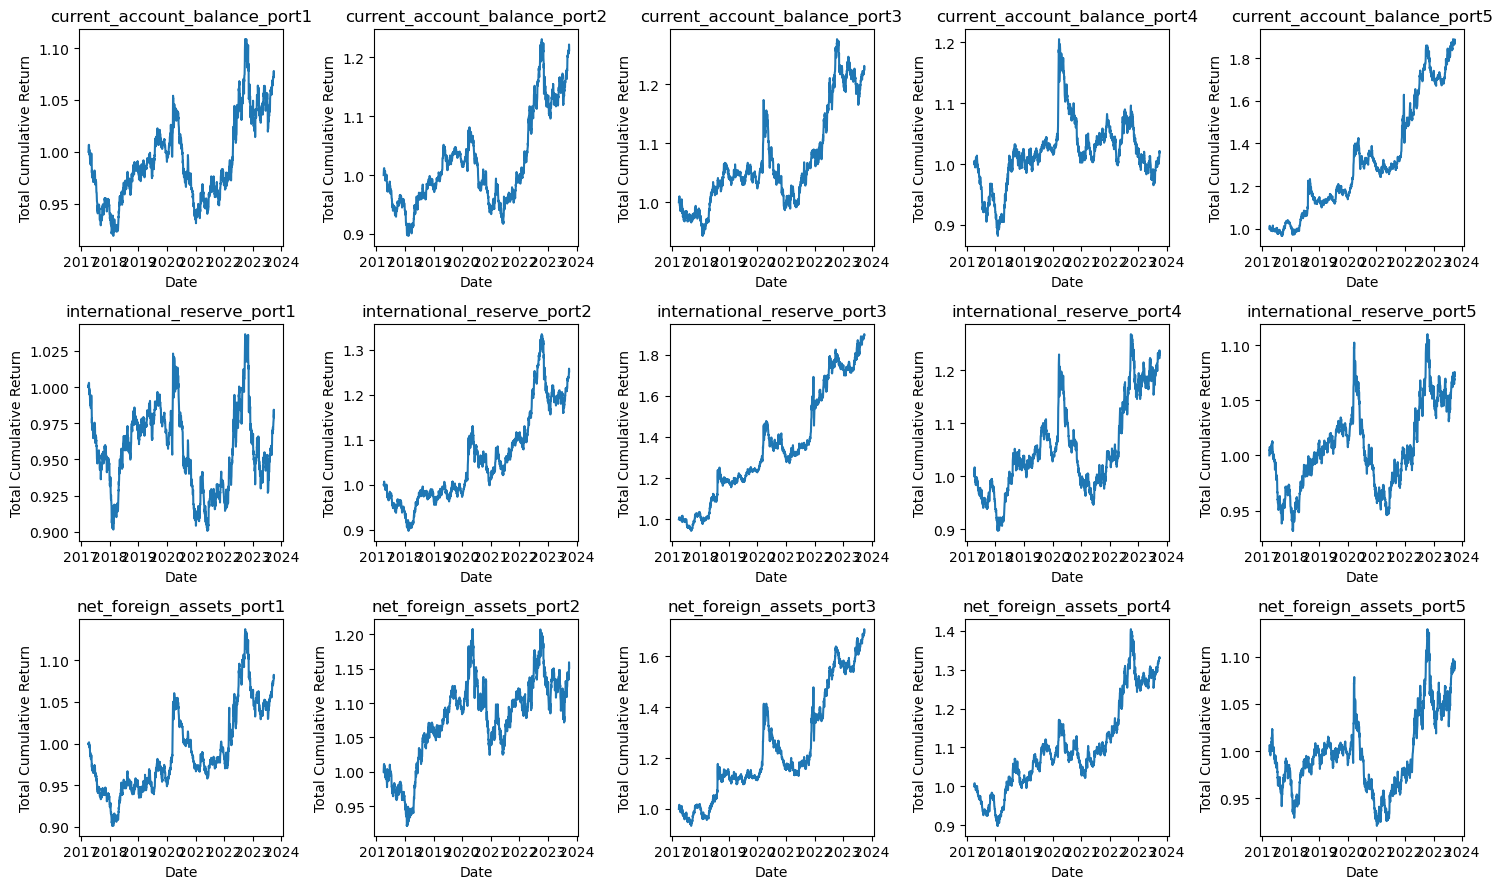

In [49]:
# 設置子圖的大小和形狀
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

# 設置每個子圖的標題
for (key, df), ax in zip(Eco_port_3m_value.items(), axes.flatten()):
    sns.lineplot(data=df, x=df.index, y='Total_cumret', ax=ax)
    ax.set_title(key)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Cumulative Return')

# 調整子圖的間距和外觀
plt.tight_layout()
plt.show()


# 完整時間版本

In [149]:
# 後面會用到的函數
def create_seg(max_value):
    rank_count = int(max_value)
    quotient = int(rank_count // 5)
    remainder = int(rank_count % 5)
    seg = [i for i in range(quotient+1, (quotient+1) * 5, quotient+1)]
    if remainder == 0:
        seg = list(range(quotient,rank_count,quotient))
        return seg
    elif remainder == 4:
        seg[2] -= 1
        seg[3] -= 1
    elif remainder == 3:
        seg[1] -= 1
        seg[2] -= 1
        seg[3] -= 2
    elif remainder == 2:
        seg[1] -= 1
        seg[2] -= 2
        seg[3] -= 3
    elif remainder == 1:
        seg[0] -= 1
        seg[1] -= 2
        seg[2] -= 2
        seg[3] -= 3
    return seg
# 定義一個函數將排名拆成五等分
def map_rank_to_group(value, max_value):
    # 获取列的最大值
    seg = create_seg(max_value)
    if np.isnan(value):
        pass
    elif value <= seg[0]:
        return 1
    elif seg[0] < value <= seg[1]:
        return 2
    elif seg[1] < value <= seg[2]:
        return 3
    elif seg[2] < value <= seg[3]:
        return 4
    else:
        return 5


In [183]:
total_time_rank = {}
for key,df in Eco.items():
    ranked = df.rank(axis=0, method='min', ascending=False)
    ranked = ranked.dropna(axis=1, thresh=5)
    rank_in_5 = ranked.apply(lambda x: x.map(lambda y: map_rank_to_group(y, x.max())), axis=0)
    total_time_rank[key] = rank_in_5

In [185]:
total_time_rank['current_account_balance']

,2000-12-29,2001-03-30,2001-06-29,2001-09-28,2001-12-31,2002-03-29,2002-06-28,2002-09-30,2002-12-31,2003-03-31,...,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-30,2023-03-31,2023-06-30
Name,,,,,,,,,,,,,,,,,,,,,
AU,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,3,3,3,3,3,2,3,2,3,2.0
BR,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,...,5,3,4,5,4,4,5,5,4,4.0
CN,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,...,4,5,4,3,3,3,4,4,4,4.0
CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,5,5,5,4,5,5,5,2,5.0
DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,2,1,2,1,1,1,1,1.0
HN,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4,4,4,4,4,3,3,4,3,4.0
JP,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,3,2,3,2,3,2,2,3,2.0
MX,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,5,4,4,4,4,4,4,3,5,NaN
NZ,5.0,2.0,3.0,5.0,5.0,3.0,3.0,5.0,5.0,2.0,...,5,5,5,5,5,5,5,5,5,5.0


In [197]:
port_names = ('P1', 'P2', 'P3', 'P4', 'P5')
total_time_rank_tran_matrix = {}
for key,df in total_time_rank.items():
    tran_matrix = pd.DataFrame(0, columns = port_names,
                            index = port_names)
    df = df[Excess_ret.dropna().index[:-1]]
    idxname = df.index
    for idx in idxname:
        colname = df.loc[idx].dropna().index
        for col_num in range(len(colname[:-1])):
            last_group = int(df.loc[idx, colname[col_num]])
            group = int(df.loc[idx, colname[col_num+1]])
            tran_matrix.at[f'P{last_group}', f'P{group}'] += 1
    value_counts = df[df.columns[:-1]].stack().value_counts()
    for groups in range(1,6):
        tran_matrix.loc[f'P{groups}'] /= value_counts[groups]
    total_time_rank_tran_matrix[key] = tran_matrix


In [198]:
total_time_rank_tran_matrix['current_account_balance']

,P1,P2,P3,P4,P5
P1,0.775510,0.178571,0.020408,0.015306,0.010204
P2,0.168367,0.561224,0.224490,0.020408,0.025510
P3,0.040816,0.214286,0.448980,0.204082,0.091837
P4,0.010204,0.035714,0.204082,0.479592,0.270408
P5,0.005102,0.010204,0.096939,0.280612,0.602041


In [199]:
total_time_rank_tran_matrix['international_reserve']

,P1,P2,P3,P4,P5
P1,0.979592,0.020408,0.000000,0.000000,0.000000
P2,0.020408,0.918367,0.061224,0.000000,0.000000
P3,0.000000,0.057292,0.859375,0.083333,0.000000
P4,0.000000,0.000000,0.076531,0.887755,0.030612
P5,0.000000,0.000000,0.000000,0.030612,0.969388


In [200]:
total_time_rank_tran_matrix['net_foreign_assets']

,P1,P2,P3,P4,P5
P1,0.903061,0.096939,0.000000,0.000000,0.00000
P2,0.091837,0.780612,0.127551,0.000000,0.00000
P3,0.000000,0.138728,0.826590,0.034682,0.00000
P4,0.000000,0.000000,0.030612,0.943878,0.02551
P5,0.000000,0.000000,0.000000,0.025510,0.97449


In [160]:
# 持有三個月
total_time_Eco_port_3m={}
total_time_ranks_for_port = {'current_account_balance':total_time_rank['current_account_balance'],
                            'international_reserve':total_time_rank['international_reserve'],
                            'net_foreign_assets':total_time_rank['net_foreign_assets']}
Excess_ret = (Mid_FX_Q-Mid_FX_FW_Q.shift(1))/Mid_FX_Q.shift(1)

for key, df in total_time_ranks_for_port.items():
    for port in range(1,6):
        FX_position = pd.DataFrame(columns=Excess_ret.columns, index=Excess_ret.index)
        for dt in df.columns:
            cur = list(df[df.loc[:,dt]==port].index)
            weight = 1/len(cur) if cur else 0
            start_date, end_date = gen_start_end_date(dt)
            FX_position.loc[((FX_position.index>=start_date) & (FX_position.index<end_date)),cur] = weight # 每個portfolio中貨幣平均持有
        FX_position.dropna(how='all', inplace=True)
        total_time_Eco_port_3m[key+f'_port{port}'] = FX_position
        

In [161]:
total_time_Eco_port_3m['current_account_balance_port1']

,AU,BR,CN,CZ,DK,HN,JP,MX,NZ,NW,PO,SP,SA,KO,SD,SW,TW,TK,UK,EK
Date,,,,,,,,,,,,,,,,,,,,
2001-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN
2001-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN
2002-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN
2002-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN
2022-12-30,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN
2023-03-31,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,0.25,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN


### 貨幣超額報酬

In [238]:
total_time_Eco_port_3m_ret = {}
for key, df in total_time_Eco_port_3m.items():
    ret = Excess_ret.loc[Excess_ret.dropna().index] * df.loc[Excess_ret.dropna().index]
    ret['Sum_ret'] = ret.sum(axis=1)
    total_time_Eco_port_3m_ret[key] = ret

In [239]:
total_time_Eco_port_3m_ret_summary = {}
summary_index = ('Mean', 'St. dev.', 'Skew', 'Kurt', 'SR', 'AC', 'Freq')
summary_columns = ('P1', 'P2', 'P3', 'P4', 'P5', 'P1-P5')
for key, df in total_time_rank.items():
    summary = pd.DataFrame(index=summary_index, columns=summary_columns)
    for port in range(1,7):
        if port<=5:
            ret = total_time_Eco_port_3m_ret[key+f'_port{port}']['Sum_ret']*100 #乘以100會影響mean和st.dev. 這樣顯示的結果為報酬率%數
            col_name = f'P{port}'
            #這邊先計算freq
            port_df = total_time_Eco_port_3m[key+f'_port{port}']
            # 初始化列表存储变化比例
            changes = []
            # 计算变化比例
            for i in range(1, len(port_df)):
                prev_positions = set(port_df.iloc[i - 1].dropna().index)
                curr_positions = set(port_df.iloc[i].dropna().index)
                intersection = prev_positions.intersection(curr_positions)
                change_ratio = 1-(len(intersection) / len(prev_positions))
                changes.append(change_ratio)
        else:
            ret = (total_time_Eco_port_3m_ret[key+f'_port1']['Sum_ret']-total_time_Eco_port_3m_ret[key+f'_port5']['Sum_ret'])*100
            col_name = summary_columns[-1]
            
        summary.loc['Mean',col_name] = ret.mean()*4  #年化，顯示為年化報酬率
        summary.loc['St. dev.',col_name] = ret.std()*np.sqrt(4) #年化，顯示為年化報酬率標準差
        summary.loc['Skew',col_name] = ret.skew()
        summary.loc['Kurt',col_name] = ret.kurt()
        summary.loc['SR',col_name] = (ret.mean()*4)/(ret.std()*np.sqrt(4)) #年化
        summary.loc['AC',col_name] = ret.autocorr()
        summary.loc['Freq',col_name] = np.mean(changes)
        
    total_time_Eco_port_3m_ret_summary[key] = summary

In [240]:
total_time_Eco_port_3m_ret_summary['current_account_balance']

,P1,P2,P3,P4,P5,P1-P5
Mean,-2.220485,-2.74993,-2.041728,0.59925,-4.045893,1.825409
St. dev.,6.675261,7.415398,6.47447,8.523793,9.693235,6.041007
Skew,-0.001929,-0.10012,-0.58519,-0.462069,-0.756862,0.858443
Kurt,-0.657322,-0.40402,-0.130796,0.196912,0.399407,2.075168
SR,-0.332644,-0.37084,-0.315351,0.070303,-0.417394,0.30217
AC,-0.102015,-0.094091,-0.192032,-0.032373,-0.194971,-0.069429
Freq,0.174157,0.378277,0.490637,0.509363,0.365169,0.365169


In [241]:
total_time_Eco_port_3m_ret_summary['international_reserve']

,P1,P2,P3,P4,P5,P1-P5
Mean,-1.396303,-1.889208,-2.759679,-2.618024,-1.622465,0.226162
St. dev.,5.948916,8.871522,9.733825,8.59561,5.448889,3.416121
Skew,-0.089723,-0.103066,-0.45167,-0.422245,-0.280247,0.523257
Kurt,-0.453146,-0.095858,-0.236678,0.156119,-0.836986,0.404176
SR,-0.234716,-0.212952,-0.283514,-0.304577,-0.297761,0.066204
AC,-0.1877,-0.16606,-0.155963,-0.06769,-0.142417,-0.226087
Freq,0.033708,0.092697,0.169476,0.134831,0.047753,0.047753


In [242]:
total_time_Eco_port_3m_ret_summary['net_foreign_assets']

,P1,P2,P3,P4,P5,P1-P5
Mean,-1.629865,-2.025049,-1.926709,-2.303738,-2.849266,1.219401
St. dev.,7.930341,9.544119,8.401703,7.82745,5.886388,5.013573
Skew,-0.575185,-0.170522,-0.223154,-0.472976,-0.038027,-0.76642
Kurt,0.041393,0.415973,-0.750006,-0.532443,-0.226966,0.927215
SR,-0.205523,-0.212178,-0.229324,-0.294315,-0.484043,0.24322
AC,-0.195062,-0.18346,-0.103459,-0.055088,-0.029108,0.003703
Freq,0.088068,0.221591,0.245265,0.110795,0.034091,0.034091


### 單純貨幣報酬

In [243]:
total_time_Eco_port_3m_ret = {}
for key, df in total_time_Eco_port_3m.items():
    ret = Currency_ret.loc[Excess_ret.dropna().index] * df.loc[Excess_ret.dropna().index]
    ret['Sum_ret'] = ret.sum(axis=1)
    total_time_Eco_port_3m_ret[key] = ret

In [244]:
total_time_Eco_port_3m_ret_summary = {}
summary_index = ('Mean', 'St. dev.', 'Skew', 'Kurt', 'SR', 'AC', 'Freq')
summary_columns = ('P1', 'P2', 'P3', 'P4', 'P5', 'P1-P5')
for key, df in total_time_rank.items():
    summary = pd.DataFrame(index=summary_index, columns=summary_columns)
    for port in range(1,7):
        if port<=5:
            ret = total_time_Eco_port_3m_ret[key+f'_port{port}']['Sum_ret']*100 #乘以100會影響mean和st.dev. 這樣顯示的結果為報酬率%數
            col_name = f'P{port}'
            #這邊先計算freq
            port_df = total_time_Eco_port_3m[key+f'_port{port}']
            # 初始化列表存储变化比例
            changes = []
            # 计算变化比例
            for i in range(1, len(port_df)):
                prev_positions = set(port_df.iloc[i - 1].dropna().index)
                curr_positions = set(port_df.iloc[i].dropna().index)
                intersection = prev_positions.intersection(curr_positions)
                change_ratio = 1-(len(intersection) / len(prev_positions))
                changes.append(change_ratio)
        else:
            ret = (total_time_Eco_port_3m_ret[key+f'_port1']['Sum_ret']-total_time_Eco_port_3m_ret[key+f'_port5']['Sum_ret'])*100
            col_name = summary_columns[-1]
            
        summary.loc['Mean',col_name] = ret.mean()*4  #年化，顯示為年化報酬率
        summary.loc['St. dev.',col_name] = ret.std()*np.sqrt(4) #年化，顯示為年化報酬率標準差
        summary.loc['Skew',col_name] = ret.skew()
        summary.loc['Kurt',col_name] = ret.kurt()
        summary.loc['SR',col_name] = (ret.mean()*4)/(ret.std()*np.sqrt(4)) #年化
        summary.loc['AC',col_name] = ret.autocorr()
        summary.loc['Freq',col_name] = np.mean(changes)
        
    total_time_Eco_port_3m_ret_summary[key] = summary

In [245]:
total_time_Eco_port_3m_ret_summary['current_account_balance']

,P1,P2,P3,P4,P5,P1-P5
Mean,-1.283113,-2.308257,-2.791659,-1.917673,-7.958663,6.67555
St. dev.,6.674023,7.459265,6.412339,8.54609,10.234556,6.20776
Skew,-0.030143,-0.058426,-0.522704,-0.468875,-0.626324,1.061396
Kurt,-0.547754,-0.385,-0.092031,0.105756,0.167288,1.830358
SR,-0.192255,-0.309448,-0.435357,-0.224392,-0.777627,1.075356
AC,-0.09221,-0.087774,-0.161907,-0.04838,-0.241843,-0.231025
Freq,0.174157,0.378277,0.490637,0.509363,0.365169,0.365169


In [246]:
total_time_Eco_port_3m_ret_summary['international_reserve']

,P1,P2,P3,P4,P5,P1-P5
Mean,-0.268615,-2.692367,-8.396987,-3.310592,-1.541435,1.27282
St. dev.,6.027524,9.204561,9.580056,8.951573,5.432103,3.420986
Skew,-0.107365,-0.158381,-0.420985,-0.209957,-0.294468,0.59213
Kurt,-0.438958,-0.067814,-0.228487,0.079145,-0.746556,0.372873
SR,-0.044565,-0.292504,-0.876507,-0.369834,-0.283764,0.372062
AC,-0.167085,-0.15429,-0.167425,-0.150614,-0.13994,-0.257294
Freq,0.033708,0.092697,0.169476,0.134831,0.047753,0.047753


In [247]:
total_time_Eco_port_3m_ret_summary['net_foreign_assets']

,P1,P2,P3,P4,P5,P1-P5
Mean,-3.38159,-3.90141,-5.473333,-2.13749,-1.863937,-1.517653
St. dev.,8.09249,9.729065,8.301145,8.282099,5.941678,5.043444
Skew,-0.677914,-0.217356,-0.141574,-0.152054,-0.05218,-0.826958
Kurt,0.182145,0.513401,-0.890353,-0.365139,-0.14764,1.293801
SR,-0.417868,-0.401006,-0.659347,-0.258086,-0.313705,-0.300916
AC,-0.175361,-0.188001,-0.084292,-0.126117,-0.023562,-0.043149
Freq,0.088068,0.221591,0.245265,0.110795,0.034091,0.034091
